# Project: Investigate a Dataset - European Soccer Data 2008 - 2016 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

I have selected the European soccer dataset for my analysis.  I would like to know if there is a change in average aggregate goals scored in the English Premier League over the time period.  Similarly, I would like to check if there are trends in goal scoring from home or away teams.    


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
con = sqlite3.connect(r"C:\Users\DMcEldowney\Desktop\McEldowney General\Career Advancement\Udacity - Data Analyst Nanodegree\Project 2 - Investigate a Dataset\database.sqlite")
df_match = pd.read_sql_query("""SELECT * from Match
                             JOIN Country on Country.id = Match.country_id
                             JOIN League on League.id = Match.league_id
                             WHERE Country.name = 'England'
                             AND League.name = 'England Premier League'
                             ORDER by date""", con)                             
df_match.head()
df_match.describe()

,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,VCA,GBH,GBD,GBA,BSH,BSD,BSA,id,id,country_id
count,3040.000000,3040.0,3040.0,3040.00000,3.040000e+03,3040.00000,3040.00000,3040.000000,3040.000000,3040.0,...,3040.000000,1899.000000,1899.000000,1899.000000,1900.000000,1900.000000,1900.000000,3040.0,3040.0,3040.0
mean,3248.500000,1729.0,1729.0,19.50000,1.178767e+06,9142.27500,9142.27500,1.550987,1.159539,1.0,...,4.956706,2.606840,3.761980,4.566435,2.625553,3.773584,4.790621,1729.0,1729.0,1729.0
std,877.716735,0.0,0.0,10.96766,4.909627e+05,753.08936,753.08936,1.311615,1.144629,0.0,...,3.984338,1.586001,0.842088,3.301710,1.655792,0.837965,3.786069,0.0,0.0,0.0
min,1729.000000,1729.0,1729.0,1.00000,4.890420e+05,8191.00000,8191.00000,0.000000,0.000000,1.0,...,1.220000,1.100000,3.000000,1.250000,1.100000,3.000000,1.220000,1729.0,1729.0,1729.0
25%,2488.750000,1729.0,1729.0,10.00000,7.946915e+05,8528.00000,8528.00000,1.000000,0.000000,1.0,...,2.500000,1.650000,3.250000,2.450000,1.620000,3.250000,2.500000,1729.0,1729.0,1729.0
50%,3248.500000,1729.0,1729.0,19.50000,1.127220e+06,8659.00000,8659.00000,1.000000,1.000000,1.0,...,3.600000,2.100000,3.400000,3.400000,2.100000,3.400000,3.400000,1729.0,1729.0,1729.0
75%,4008.250000,1729.0,1729.0,29.00000,1.537336e+06,9879.00000,9879.00000,2.000000,2.000000,1.0,...,5.500000,2.800000,3.900000,5.250000,2.800000,3.900000,5.500000,1729.0,1729.0,1729.0
max,4768.000000,1729.0,1729.0,38.00000,1.989079e+06,10261.00000,10261.00000,9.000000,6.000000,1.0,...,29.000000,12.000000,8.500000,21.000000,13.000000,8.500000,26.000000,1729.0,1729.0,1729.0


The code reads English Premier League match data from the database and returns the headings and summary statistics.  The Match data includes 3,040 rows with certain data missing from fields not relevant to our analysis.


### Data Cleaning 

The focus of the analysis will be on home_team_goal and away_team_goal using date as a basis. Each of these columns appear to be complete, but require the date time to be converted.

In [24]:
df_match['date'] = pd.to_datetime(df_match.date) 

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1:  What are the average aggregate goals scored over the time period?

The results indicate that there does not appear to be a trend in aggregate goals scored over time.

In [3]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df_match['agg_goal'] = df_match['home_team_goal'] + df_match['away_team_goal']
df_match['year'] = pd.DatetimeIndex(df_match['date']).year
df_match.groupby('year').mean()


,id,country_id,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,home_player_X1,...,GBH,GBD,GBA,BSH,BSD,BSA,id,id,country_id,agg_goal
year,,,,,,,,,,,,,,,,,,,,,
2008,1887.030303,1729.0,1729.0,10.500000,4.891416e+05,9022.171717,9032.843434,1.373737,1.212121,1.0,...,2.655404,3.641414,4.439798,2.674596,3.655455,4.700000,1729.0,1729.0,1729.0,2.585859
2009,2116.293651,1729.0,1729.0,19.555556,5.771654e+05,8985.359788,8983.309524,1.592593,1.058201,1.0,...,2.694101,3.696402,4.588439,2.731667,3.721508,4.896455,1729.0,1729.0,1729.0,2.650794
2010,2493.112299,1729.0,1729.0,19.435829,7.509521e+05,8999.393048,8972.286096,1.590909,1.056150,1.0,...,2.613690,3.822674,4.811444,2.653128,3.826310,5.155989,1729.0,1729.0,1729.0,2.647059
2011,2867.135279,1729.0,1729.0,19.498674,9.316787e+05,9139.880637,9160.721485,1.631300,1.251989,1.0,...,2.537560,3.720716,4.510133,2.554615,3.740080,4.702626,1729.0,1729.0,1729.0,2.883289
2012,3248.892583,1729.0,1729.0,19.470588,1.128636e+06,9271.739130,9277.117647,1.613811,1.199488,1.0,...,2.577590,3.802051,4.452231,2.581253,3.825396,4.602634,1729.0,1729.0,1729.0,2.813299
2013,3633.798387,1729.0,1729.0,19.478495,1.354487e+06,9255.666667,9263.411290,1.529570,1.172043,1.0,...,2.564890,3.904231,4.516374,2.537253,3.860000,4.504725,1729.0,1729.0,1729.0,2.701613
2014,4008.500000,1729.0,1729.0,19.500000,1.599534e+06,9185.305263,9181.744737,1.534211,1.189474,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1729.0,1729.0,1729.0,2.723684
2015,4388.500000,1729.0,1729.0,19.500000,1.856448e+06,9179.697368,9177.452632,1.450000,1.121053,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1729.0,1729.0,1729.0,2.571053
2016,4608.236842,1729.0,1729.0,29.000000,1.988916e+06,9216.278947,9206.621053,1.563158,1.236842,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1729.0,1729.0,1729.0,2.800000


### Research Question 2:  What are the average goals scored by home and away teams over the time period?

Review of scatter plot information to identify trends, which was difficult to do.

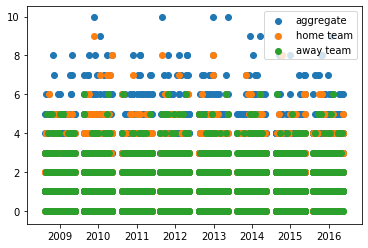

In [53]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.
plt.scatter(df_match['date'], df_match['agg_goal'])
plt.scatter(df_match['date'], df_match['home_team_goal'])
plt.scatter(df_match['date'], df_match['away_team_goal'])
plt.legend(['aggregate', 'home team', 'away team'])

Given difficulty in observing trends in data visuall, I created trendlines within the data to determine if there is a meaningful trend in goal scoring over the time period.

In [4]:
np.polyfit(df_match['year'], df_match['agg_goal'],1), np.polyfit(df_match['year'], df_match['home_team_goal'],1), np.polyfit(df_match['year'], df_match['away_team_goal'],1)

(array([ 3.84045585e-03, -5.01644686e+00]),
 array([-5.56903312e-03,  1.27558467e+01]),
 array([ 9.40948898e-03, -1.77722935e+01]))

Trend lines indicate that there is a very slight increase in aggregate goals scored.  The underlying cause of this trend in aggregate goal scoring is an increase in away teams goals more than offsets a decline in home team goals over that period.    

<a id='conclusions'></a>
## Conclusions

The trends over the historical period of 2008 through 2016 in the English Premier League shows that: (1) aggregate goal scoring increased slightly (0.0038); (2) home team goals declined moderately (-0.0056); (3) away team goals increased significantly (0.0094).
